# Нанесение тоник пленок в вакууме

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sympy as smp
import scipy.integrate as integrate

### Данные спектрометра

In [186]:
def plotData(filePath: str)->None:
    waveLengthData, ampData = [], []
    data = open(filePath)
    for line in data:
        dataPeace = line.split("\t")
        waveLengthData.append(float(dataPeace[0].split(',')[0]))
        if len(dataPeace[0].split(','))-1:
            waveLengthData[-1]+=float(dataPeace[0].split(',')[1])/np.power(10,len(dataPeace[0].split(',')[1]))
        ampData.append(float(dataPeace[1].split(',')[0]))
    waveLengthData = np.array(waveLengthData)
    ampData = np.array(ampData)
    x = np.linspace(waveLengthData[0]+0.1,waveLengthData[-1]-0.1,len(waveLengthData)*5)
    y = interp1d(waveLengthData,ampData,kind = "linear")(x)
    plt.plot(x,y)
    plt.show()
    return interp1d(waveLengthData,ampData,kind = "linear")

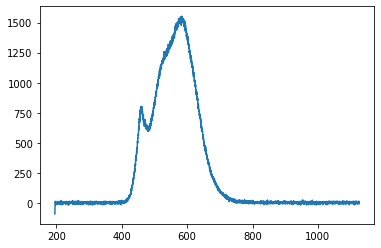

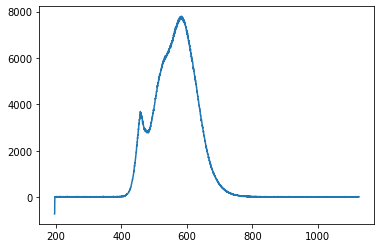

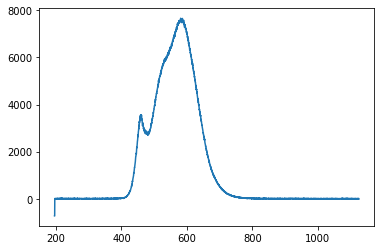

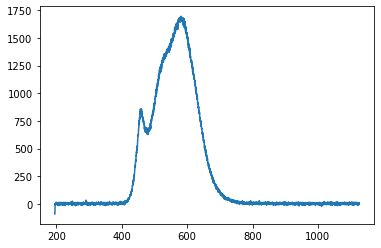

In [187]:
spectroFunctions = []
for i in [str(i)+".txt" for i in range(2,6)]:
    spectroFunctions.append(plotData(i))


### Рассчёт $t_{0}$

#### Данные, полученные в работе

In [188]:
# m_n,mError_n = 0.0112*np.power(0.1,3),0.0005*np.power(0.1,3) #масса проволоки - использовались электронные весы
l_n,lError_n = 0.06, 0.001 #длина проволоки - использовалась линейка
R_n, RError_n = 0.1, 0.001 #расстояние от испарителя, до лапки с материалом напыления
ro_n = 2.7*np.power(0.1,3) #плотность аллюминия
roError_n = 0 #считаем, что плотность аллюминия опеределена точно
r_n,rError_n = 0.0015,0 #радиус проволоки - 3мм - указан на самой проволоке

##### Вычисление массы проволоки

In [189]:
m_n = l_n*np.pi*np.power(r_n,2)*ro_n
mError_n = lError_n*np.pi*np.power(r_n,2)*ro_n
print("Масса проволоки: "+str(m_n)+" +/- "+str(mError_n)+" кг ")

Масса проволоки: 1.14511052223348e-09 +/- 1.9085175370558e-11 кг 


#### Метод частных производных и необходимые функции 

In [190]:
m,ro,R = smp.symbols(r"m \rho R")
dm,dro,dR = smp.symbols(r"\Delta_{m} \Delta_{\rho} \Delta_{R}")
t = m/(smp.pi*4*ro*(R**2))
t #формула для вычисления толщины

m/(4*pi*R**2*\rho)

In [191]:
tVariables = [m,ro,R]
tErrorVariables = [dm,dro,dR]
tGradient = smp.Matrix([t.diff(i) for i in tVariables])
tErrorVector = smp.Matrix([tGradient[i]*tErrorVariables[i] for i in range(len(tErrorVariables))])
dt = tErrorVector.norm() #ошибка вычсиления t
dt

sqrt(Abs(\Delta_{m}/(R**2*\rho))**2/(16*pi**2) + Abs(\Delta_{R}*m/(R**3*\rho))**2/(4*pi**2) + Abs(\Delta_{\rho}*m/(R**2*\rho**2))**2/(16*pi**2))

In [192]:
tGradient #градиент t

Matrix([
[    1/(4*pi*R**2*\rho)],
[-m/(4*pi*R**2*\rho**2)],
[   -m/(2*pi*R**3*\rho)]])

In [193]:
smp.print_latex(dt)

\sqrt{\frac{\left|{\frac{\Delta_{m}}{R^{2} \rho}}\right|^{2}}{16 \pi^{2}} + \frac{\left|{\frac{\Delta_{R} m}{R^{3} \rho}}\right|^{2}}{4 \pi^{2}} + \frac{\left|{\frac{\Delta_{\rho} m}{R^{2} \rho^{2}}}\right|^{2}}{16 \pi^{2}}}


#### Вычисление толщины и погрешности

In [194]:
t_n = smp.lambdify(tVariables,t)(m_n,ro_n,R_n)
tError_n = smp.lambdify(tVariables+tErrorVariables,dt)(m_n,ro_n,R_n,mError_n,roError_n,RError_n)
print("Толщина плёнки: "+str(t_n*np.power(10,9))+" +/- "+str(tError_n*np.power(10,9))+" нМ ")

Толщина плёнки: 3374.9999999999986 +/- 87.86530885394984 нМ 


## Вычисление $t_{0}$ по данным спектрографа

#### Рассчет потока излучения

In [202]:
leftIntegralLimit,rightIntegralLimit = 200,1000
lightIntensity,lightIntensityError = integrate.quad(spectroFunctions[1],leftIntegralLimit,rightIntegralLimit)
lightIntensity #поток излучения через стеклянную поверхность

C:\Users\Владимир\AppData\Local\Temp\ipykernel_11456\469327946.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lightIntensity,lightIntensityError = integrate.quad(spectroFunctions[1],leftIntegralLimit,rightIntegralLimit)


1173638.2637442586

In [204]:
sprayIntensity,sprayIntensityError = integrate.quad(spectroFunctions[-1],leftIntegralLimit,rightIntegralLimit)
sprayIntensity

C:\Users\Владимир\AppData\Local\Temp\ipykernel_11456\517515433.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sprayIntensity,sprayIntensityError = integrate.quad(spectroFunctions[-1],leftIntegralLimit,rightIntegralLimit)


257361.60287347098

#### Рассчет коэффициента поглощения

In [207]:
absorption = sprayIntensity/lightIntensity
absorption

0.21928528646672626